# Autoregression from lib&scratch with real sample data
$y(t) = b_0 + \sum_{i=1}^{lag} b_i*y(t-i)$

## data prepare
[data-ref](https://machinelearningmastery.com/time-series-datasets-for-machine-learning/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('monthly-sunspots.csv')
data

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


## training

In [34]:
# from AR import AutoRegression
from statsmodels.tsa.ar_model import AutoReg
lags = 130

train = data['Sunspots'][:2600]
model = AutoReg(train, lags = lags)
model_fit = model.fit()
coef = model_fit.params

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


### prediction using libs

In [62]:
test = data['Sunspots'][2600:]

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
rmse

33.920729989009615

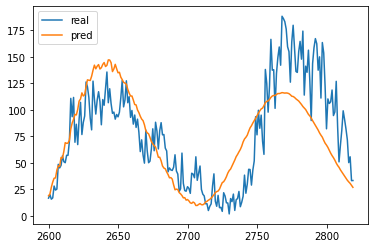

In [63]:
plt.plot(test[:], label='real')
plt.plot(predictions[:], label='pred')
plt.legend()

### prediction from scratch

In [66]:
import numpy as np
test = data['Sunspots'][2600:].values
predictions = []

# walk forward over time steps in test
history = train[-lags:].values

for i in range(len(test)):
    lag = history[-lags:]
    
    y_pred = coef[0]
    for k in range(lags):
        y_pred += coef[k+1] * lag[k]
    
    predictions.append(y_pred)
    history = np.append(history, test[i])

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
rmse

43.352665790655685

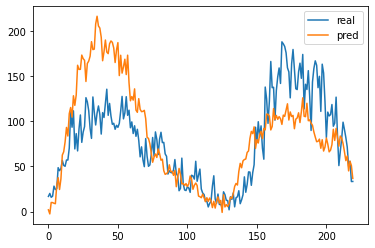

In [67]:
plt.plot(test[:], label='real')
plt.plot(predictions[:], label='pred')
plt.legend()